In [62]:
import pandas as pd
import numpy as np
from  mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [63]:
x1 = np.random.randint(1,10,10)
x2 = np.random.randint(1,10,10)
y = np.random.randint(0,2,10)
df = pd.DataFrame({
    'x1' : x1,
    'x2':x2,
    'y':y
})

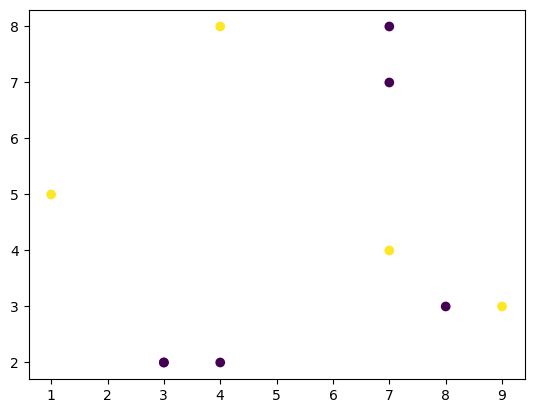

In [64]:
plt.scatter(df['x1'],df['x2'],c=y)

In [65]:
df1=df
df1
org_df = df.copy(True)


In [66]:
from sklearn.tree import DecisionTreeClassifier



d1 = DecisionTreeClassifier(max_depth=1)

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

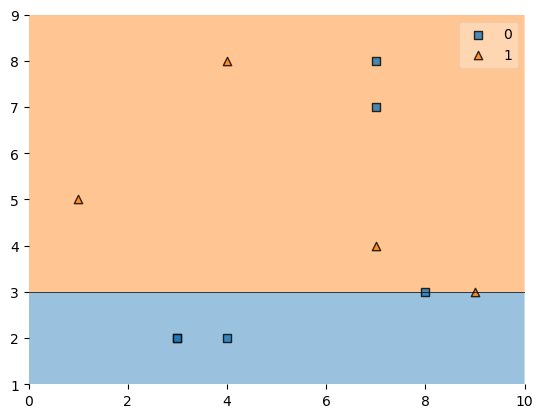

In [67]:
d1.fit(df1.iloc[:,:2],df['y'])
df1['y_pred'] = d1.predict(df1.iloc[:,:2])
plot_decision_regions(np.array(org_df.iloc[:,:2]),np.array(org_df.iloc[:,2]),d1)

In [68]:
df1['weight'] = 1/len(df1)
# plot_tree(d1)
# df1
df[df1['y']!=df1['y_pred']]['weight'].sum()
from math import log
def get_error(df):
    return df[df['y']!=df['y_pred']]['weight'].sum()

def get_alpha(err):
    return (0.5*np.log(((1-err)/err)))


In [69]:
err = get_error(df1)
apha1 = get_alpha(err)


In [70]:
def upsampling(df,aplha1=apha1):
    if df['y'] != df['y_pred']:
        return df['weight'] * np.exp(aplha1)
    else:
        return df['weight'] * np.exp(-aplha1)

df1['update_weight'] = df1.apply(upsampling,axis=1)
df1['normalize_weight'] = df1['update_weight']/df1['update_weight'].sum()
df1['normalize_weight'].sum()

0.9999999999999999

In [71]:
df1

,x1,x2,y,y_pred,weight,update_weight,normalize_weight
0,1,5,1,1,0.1,0.065465,0.071429
1,7,8,0,1,0.1,0.152753,0.166667
2,9,3,1,1,0.1,0.065465,0.071429
3,8,3,0,1,0.1,0.152753,0.166667
4,3,2,0,0,0.1,0.065465,0.071429
5,4,2,0,0,0.1,0.065465,0.071429
6,7,7,0,1,0.1,0.152753,0.166667
7,3,2,0,0,0.1,0.065465,0.071429
8,4,8,1,1,0.1,0.065465,0.071429
9,7,4,1,1,0.1,0.065465,0.071429


In [72]:
df['upper'] = np.cumsum(df['normalize_weight'])
df['lower'] = df['upper']-df['normalize_weight']
cols = list(df.columns)
i1, i2 = cols.index('upper'), cols.index('lower')
cols[i1], cols[i2] = cols[i2], cols[i1]
df = df[cols]


In [73]:
df

,x1,x2,y,y_pred,weight,update_weight,normalize_weight,lower,upper
0,1,5,1,1,0.1,0.065465,0.071429,0.000000,0.071429
1,7,8,0,1,0.1,0.152753,0.166667,0.071429,0.238095
2,9,3,1,1,0.1,0.065465,0.071429,0.238095,0.309524
3,8,3,0,1,0.1,0.152753,0.166667,0.309524,0.476190
4,3,2,0,0,0.1,0.065465,0.071429,0.476190,0.547619
5,4,2,0,0,0.1,0.065465,0.071429,0.547619,0.619048
6,7,7,0,1,0.1,0.152753,0.166667,0.619048,0.785714
7,3,2,0,0,0.1,0.065465,0.071429,0.785714,0.857143
8,4,8,1,1,0.1,0.065465,0.071429,0.857143,0.928571
9,7,4,1,1,0.1,0.065465,0.071429,0.928571,1.000000


In [74]:
idx = []
for i in range(len(df)):
    num = np.random.random()
    # print(num)
    a = df[(df['lower'] <= num) &( num < df['upper'])].index
    idx.append(a.values[0])
print(idx)
df2 = df.iloc[idx,[0,1,2]]
df2

[7, 5, 3, 5, 2, 7, 9, 2, 7, 5]


,x1,x2,y
7,3,2,0
5,4,2,0
3,8,3,0
5,4,2,0
2,9,3,1
7,3,2,0
9,7,4,1
2,9,3,1
7,3,2,0
5,4,2,0


In [75]:
np.random.random(6)

array([0.02796135, 0.79149873, 0.41623526, 0.86829362, 0.31548466,
       0.54837281])

In [76]:
from sklearn.tree import DecisionTreeClassifier



d2 = DecisionTreeClassifier(max_depth=1)

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

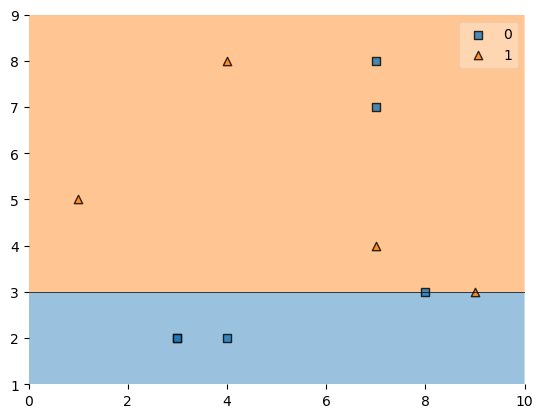

In [77]:
d2.fit(df2.iloc[:,:2],df2['y'])
df2['y_pred'] = d2.predict(df2.iloc[:,:2])
plot_decision_regions(np.array(org_df.iloc[:,:2]),np.array(org_df.iloc[:,2]),d2)
# df2

In [78]:
df2['weight'] = 1/len(df2)
# plot_tree(d1)
# df1
df2[df2['y']!=df2['y_pred']]['weight'].sum()

0.1

In [79]:
err = get_error(df2)
apha2 = get_alpha(err)

In [80]:
def upsampling(df2,aplha1=apha1):
    if df2['y'] != df2['y_pred']:
        return df2['weight'] * np.exp(aplha1)
    else:
        return df2['weight'] * np.exp(-aplha1)

df2['update_weight'] = df2.apply(upsampling,axis=1)
df2['normalize_weight'] = df2['update_weight']/df2['update_weight'].sum()
df2['normalize_weight'].sum()

1.0

In [81]:
df2['upper'] = np.cumsum(df2['normalize_weight'])
df2['lower'] = df2['upper']-df2['normalize_weight']
cols = list(df2.columns)
i1, i2 = cols.index('upper'), cols.index('lower')
cols[i1], cols[i2] = cols[i2], cols[i1]
df2 = df2[cols]
df2

,x1,x2,y,y_pred,weight,update_weight,normalize_weight,lower,upper
7,3,2,0,0,0.1,0.065465,0.088235,0.000000,0.088235
5,4,2,0,0,0.1,0.065465,0.088235,0.088235,0.176471
3,8,3,0,1,0.1,0.152753,0.205882,0.176471,0.382353
5,4,2,0,0,0.1,0.065465,0.088235,0.382353,0.470588
2,9,3,1,1,0.1,0.065465,0.088235,0.470588,0.558824
7,3,2,0,0,0.1,0.065465,0.088235,0.558824,0.647059
9,7,4,1,1,0.1,0.065465,0.088235,0.647059,0.735294
2,9,3,1,1,0.1,0.065465,0.088235,0.735294,0.823529
7,3,2,0,0,0.1,0.065465,0.088235,0.823529,0.911765
5,4,2,0,0,0.1,0.065465,0.088235,0.911765,1.000000


In [82]:
idx = []
for i in range(len(df2)):
    num = np.random.random()
    # print(num)
    a = df2[(df2['lower'] <= num) &( num < df2['upper'])].index
    idx.append(a.values[0])
print(idx)
df3 = df2.iloc[idx,[0,1,2,4]]
df3

[7, 7, 5, 2, 3, 5, 5, 5, 3, 5]


,x1,x2,y,weight
2,9,3,1,0.1
2,9,3,1,0.1
7,3,2,0,0.1
3,8,3,0,0.1
5,4,2,0,0.1
7,3,2,0,0.1
7,3,2,0,0.1
7,3,2,0,0.1
5,4,2,0,0.1
7,3,2,0,0.1


In [83]:
d3 = DecisionTreeClassifier(max_depth=1)
d3.fit(df3.iloc[:,:2],df3['y'])

DecisionTreeClassifier(max_depth=1)

In [84]:
df3['y_pred'] = d3.predict(df3.iloc[:,:2])

In [85]:
err = get_error(df3)
apha3 = get_alpha(err)


C:\Users\WELCOME\AppData\Local\Temp\ipykernel_8916\3053108869.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  return (0.5*np.log(((1-err)/err)))


In [86]:
alpha = [apha1,apha2,apha3]

In [87]:
def get_pred(x,alpha):
    y_pred = []
    # y_org = []
    for i in x:
        sing = np.sign(alpha[0]*(-1 if d1.predict(i.reshape(1,-1)) == 0 else 1) + alpha[1]*(-1 if d2.predict(i.reshape(1,-1)) == 0 else 1) + alpha[2]*(-1 if d3.predict(i.reshape(1,-1)) == 0 else 1)  )
        if sing == -1 :
            y_pred.append(0)
        else :
            y_pred.append(1)
    return y_pred   

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\WELCOME\anaconda3\Lib\site-packages\sklea

<Axes: >

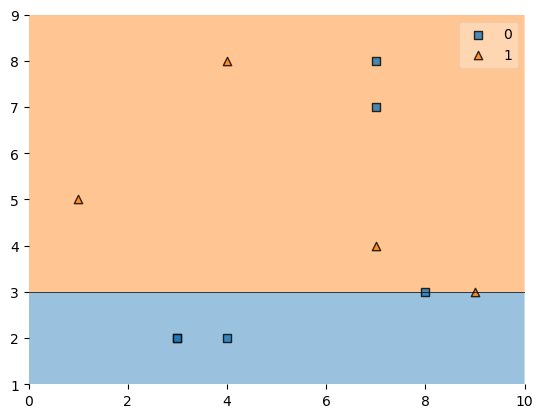

In [88]:
yy= get_pred(np.array(org_df.iloc[:,:2]),alpha)
plot_decision_regions(np.array(org_df.iloc[:,:2]),np.array(org_df.iloc[:,2]),d2)


In [89]:
from sklearn.metrics import accuracy_score


accuracy_score(org_df['y'],yy)

0.7

c:\Users\WELCOME\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

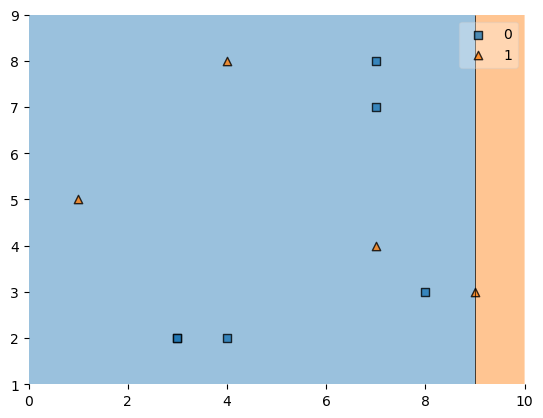

In [90]:
plot_decision_regions(np.array(org_df.iloc[:,:2]),np.array(org_df.iloc[:,2]),d3)
# plot_decision_regions(np.array(org_df.iloc[:,:2]),y,d2)
# plot_decision_regions(np.array(org_df.iloc[:,:2]),y,d3)